# EvoClust

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
%matplotlib inline
plt.style.use('classic')
#fig=figure(facecolor='white')
plt.rcParams['figure.facecolor']='white'

In [79]:
# Load the data for processing
path = "/Users/magnus/work-src/evoClustRNA/benchmark/rnas"
#infs = pd.read_csv(path + '/ade_rmsd_motf.csv')
#infs

In [80]:
%%bash
ls /Users/magnus/work-src/evoClustRNA/benchmark/rnas

ade
gmp
rp13
rp14
rp17
thf
tpp
trna


In [81]:
import seaborn as sns
sns.set_style("whitegrid");
plt.rcParams['axes.linewidth'] = 10;
#plt.rcParams['axes.color'] = "black"
plt.style.use('classic');
plt.rc("figure", facecolor="white");
plt.rcParams['lines.linewidth'] = 2;

In [82]:
"""load the data"""
"""
policz rmsd do wszystkich struktur w folderu -> csv
wyplotuj wszystkie kazdy z nich, zrob to dla ade
Q: czy farna lub simrna sa lepsze? czy chmury dla jednej sekwencji ale dwoch przypadkow sie bardzo od siebie roznia?
Q: how I calc rmsd?
"""

rnas = ['ade' , 'gmp', 'thf', 'trna', 'rp13', 'rp14', 'rp17'] # tpp',
#rnas = ['trna'] # ade, rp13 rp14, rp17
# tutaj mozesz wlaczac i wylaczca rozne trypy analizy
modes = [
         #'test',
         #'farna1000', 
         #'simrna1000', 
         #'farna5x200', 
         #'simrna5x200', 
         #'simrna1x500farna1x500',
         'simrna5x100farna5x100',
        ]

def load_and_clean_up_data(path, rna, mode):
    fn = path + '/' + rna + '/evox/' + mode + '/rmsd_all_strucs.csv'

    try:
        df = pd.read_csv(fn)
        print('file: %s' % fn)
    except IOError:
        print('Missing file: %s' % fn)
        return None
    # print('File: %s' % fn)
    """Clean up the data to fix names so you can use [:3]"""
    if rna == 'rp17':
        #df['model'].replace('rp17', 'dupa', inplace=True, regex=True)
        df['model'].replace('rp17s221c', 's221', inplace=True, regex=True)
        df['model'].replace('rp17hcf' , 'hcfx', inplace=True, regex=True)
        df['model'].replace('rp17pistol', 'pistol', inplace=True, regex=True)
        df['model'].replace('rp17s221', 's221', inplace=True, regex=True)
        df['model'].replace('rp17s223', 's223', inplace=True, regex=True)
        df['model'].replace('rp17hcfc', 'hcfx', inplace=True, regex=True)
        df['model'].replace('rp17_min', 'rp17', inplace=True, regex=True)
    if rna == 'rp14':
        #df['model'].replace('rp17', 'dupa', inplace=True, regex=True)
        df['model'].replace('rp14_aj63', 'aj63', inplace=True, regex=True)
        df['model'].replace('rp14_min', 'rp14', inplace=True, regex=True)
        df['model'].replace('rp14_aacy23', 'aacy23', inplace=True, regex=True)
        # simrna
        df['model'].replace('r14aacy23', 'aacy23', inplace=True, regex=True)
        df['model'].replace('r14aj63', 'aj63', inplace=True, regex=True)     
        df['model'].replace('rp14_rp14', 'rp14', inplace=True, regex=True)     
    if rna == 'rp13':
        #df['model'].replace('rp13cp0016', 'zcp', inplace=True, regex=True)
        #df['model'].replace('rp13nc3295', 'nc3295', inplace=True, regex=True)
        #df['model'].replace('rp13nc9445', 'znc', inplace=True, regex=True)
        #df['model'].replace('rp13nzaaox', 'nzaaox', inplace=True, regex=True)
        pass
    return df

#rna = ['rp13']
#path = "/Users/magnus/work/evo"
#f = load_and_clean_up_data(path, rnas[0], modes[3])
#df.head()

ade
file: /Users/magnus/work-src/evoClustRNA/benchmark/rnas/ade/evox/simrna5x100farna5x100/rmsd_all_strucs.csv


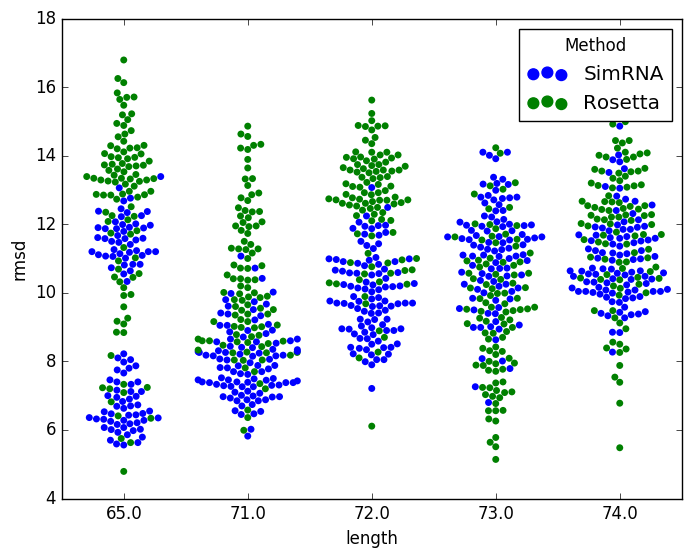

gmp
file: /Users/magnus/work-src/evoClustRNA/benchmark/rnas/gmp/evox/simrna5x100farna5x100/rmsd_all_strucs.csv


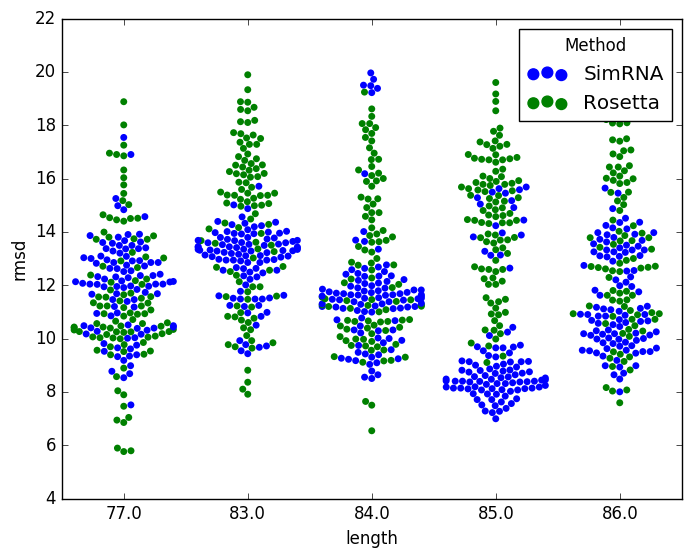

thf
file: /Users/magnus/work-src/evoClustRNA/benchmark/rnas/thf/evox/simrna5x100farna5x100/rmsd_all_strucs.csv


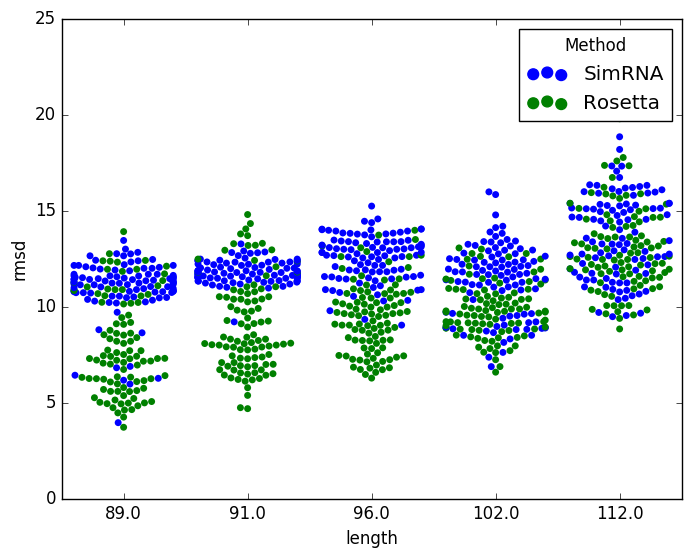

trna
file: /Users/magnus/work-src/evoClustRNA/benchmark/rnas/trna/evox/simrna5x100farna5x100/rmsd_all_strucs.csv


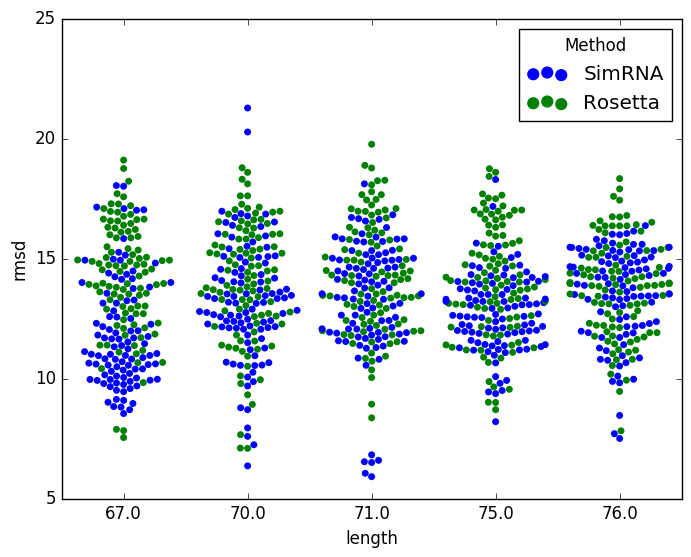

rp13
file: /Users/magnus/work-src/evoClustRNA/benchmark/rnas/rp13/evox/simrna5x100farna5x100/rmsd_all_strucs.csv


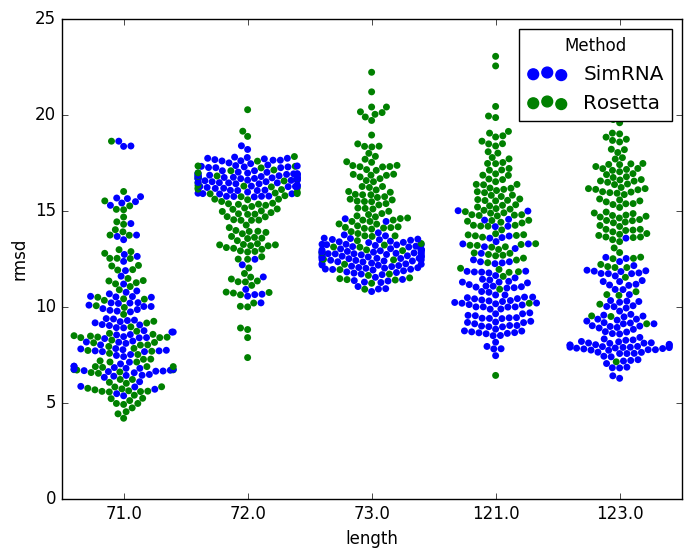

rp14
file: /Users/magnus/work-src/evoClustRNA/benchmark/rnas/rp14/evox/simrna5x100farna5x100/rmsd_all_strucs.csv


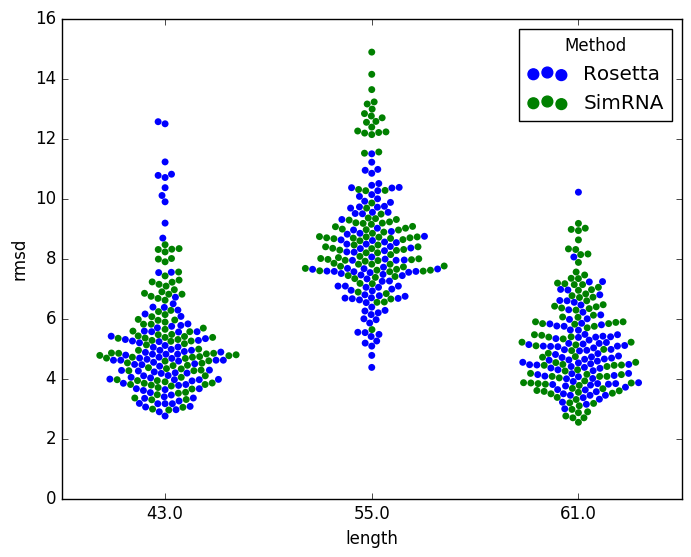

rp17
file: /Users/magnus/work-src/evoClustRNA/benchmark/rnas/rp17/evox/simrna5x100farna5x100/rmsd_all_strucs.csv


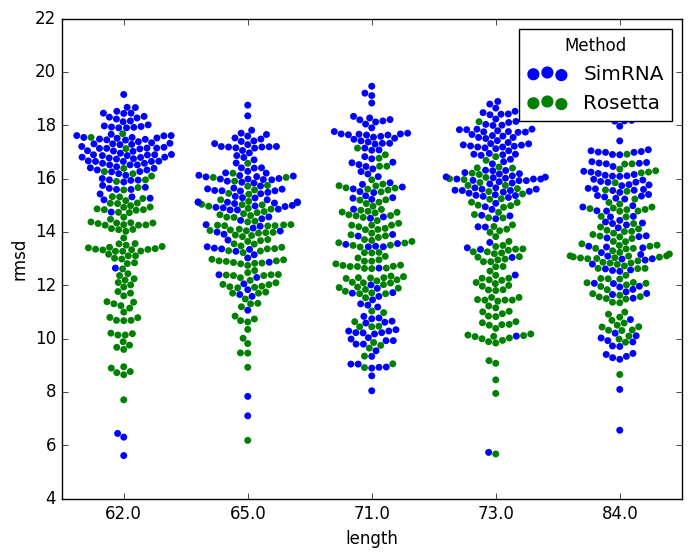

In [83]:
def plot(rna, mode, index, ax, plot_type, path):
    df = load_and_clean_up_data(path, rna, mode)
    """Hakerski sposob aby sprawdzic czy df to jest None - a wiec byl jakis problem z wczytaniem
    macierzy, czy jest to macierze, a wiec dane zostaly wczytane."""
    try:
        df.empty
    except AttributeError:
        return
    
    sns.set(font_scale=0.7)
    sns.set_context("talk")
    sns.set_style("white")
    sns.set_style("ticks")
    sns.despine()
    
    if index == 1:
        plt.set_ylabel('Core RMSD')
    #
    
    df['group_name'] = df['model'].astype(str).str[:7] # piękny hack na otrzymanie różnych RNA
    df.sort_values(by='group_name', inplace=True)
    c1 = sns.xkcd_rgb["orange"] # "r" #9b59b6"
    c2 = sns.xkcd_rgb["medium blue"] # "b" #34495e"
    flatui = [c1, c2]
    df.sort_values(by='Method', inplace=True)
    #palette = sns.palplot(sns.color_palette(flatui))
    if plot_type == 'swarmplot':
        if 'farna' in mode and 'simrna' not in mode:
            ax = sns.swarmplot(y=df.rmsd, x=df.group_name, hue=df.Method, 
                           palette=sns.color_palette([c1]),  dodge=True,
                           ax=ax, size=3)  #  violinplot # boxplot # swarmplot
        if 'farna' not in mode and 'simrna' in mode:
            ax = sns.swarmplot(y=df.rmsd, x=df.group_name, hue=df.Method, 
                           palette=sns.color_palette([c2]),  dodge=True,
                           ax=ax, size=3)  #  violinplot # boxplot # swarmplot
        if 'farna' in mode and 'simrna' in mode:
            ax = sns.swarmplot(y=df.rmsd, x=df.group_name, hue=df.Method, 
                           palette=sns.color_palette([c1, c2]),  dodge=True,
                           ax=ax, size=3)  #  violinplot # boxplot # swarmplot
    else:
        if 'farna' in mode and 'simrna' not in mode:
            ax = sns.violinplot(y=df.rmsd, x=df.group_name, hue=df.Method, 
                           palette=sns.color_palette([c1]),  dodge=True,
                           ax=ax, size=3)  #  violinplot # boxplot # swarmplot
        if 'farna' not in mode and 'simrna' in mode:
            ax = sns.violinplot(y=df.rmsd, x=df.group_name, hue=df.Method, 
                           palette=sns.color_palette([c2]),  dodge=True,
                           ax=ax, size=3)  #  violinplot # boxplot # swarmplot
        if 'farna' in mode and 'simrna' in mode:
            ax = sns.violinplot(y=df.rmsd, x=df.group_name, hue=df.Method, 
                           palette=sns.color_palette([c1, c2]),  dodge=True,
                           ax=ax, size=3)  #  violinplot # boxplot # swarmplot
    # ax.axhline(5, color="black", linewidth=2, linestyle="dashed")        
    sns.despine(left=True)
    ax.set_title(#rna + 
        ' ' + mode)# + ' (' + str(index) + ')')
 
    ax.legend(loc='upper center', #bbox_to_anchor=(0.5, 1.05),
          ncol=1, fancybox=True)#shadow=True)
    ax.set_ylim(0,max(df.rmsd + 5))
    ax.grid(linestyle='dotted', axis='y') 
    ax.set_xlabel('')
    ax.set_ylabel('')
    return

def add_len(df, rna):
    mapping = {'rp13': 
               [['tar', 71],
               ['zza', 72],
               ['znc', 73], # +1 fake, just for plotting
               ['zcp', 123],
               ['zc3', 121]],
               'gmp' :
                  [['gap', 83],
                  ['gba', 84],
               ['gbx', 86],
              ['tar', 77],
              ['gxx', 85]],
               'ade' :
               [
              ['a04', 72],
              ['a99', 65],
              ['tar', 71],
              ['b28', 73], # +2
              ['u51', 74]], # + 3
               'thf' :
                      [   
              ['hak', 102],
              ['haq', 112],
              ['hcp', 96]     ,
              ['tha', 91],
              ['tar', 89]],
               'tpp': [
['tar', 80],
['tae', 102],
['tal', 82],
['tc5', 99],
['tb2', 113]],
               'trna':
                      [
['tar', 76],
['tm5', 70],
['tm2', 75],
['taf', 67],
['tab', 71],
            ], 'rp17':
               [
               

['s23', 84],
['s21', 71],
['pis', 65],
['hcf', 73],
['tar', 62],
            ],
               'rp14':
               [
                         ['tar', 61],
                         ['aj6', 55],
                         ['cy2', 43],
            ]}
        
    for m in mapping[rna]:
        df.loc[ df['model'].str.contains(m[0]) , 'length'] = m[1]
    return df

for r in rnas:
    print(r)
    no_of_plots = len(modes)
    df = load_and_clean_up_data(path, r, modes[0])
    df = add_len(df, r)
    df['Method'] = pd.np.where(df.model.str.contains("AA"), "SimRNA", "Rosetta")  # to lub to <3
    #rp13cp0016
    sns.swarmplot(x="length", y="rmsd", data=df, 
              hue='Method') # , fig=(5,10))
    plt.show()
    #pd.set_option('display.max_rows', 4000)
#df.loc[:, df.isna().any()]
#df.loc['len' == None]
#set(df.model.str[5:13])
import numpy as np
#print(df[df.length])
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('group_name', axis=1, inplace=True)
#df